This Python code is discussed during the lecture on failure in the course:

Composite and Lightweight Materials (4MM00)

at Eindhoven University of Technology

This code:
(C) Joris Remmers (2013-2023)

## Example 1 (Failure)

Calculate the strength of a single layer of E-glass/epoxy composite loaded by a uniaxial force under an angle $\theta$. The elastic properties of the material are: $E_1=39.0\,$GPa, $E_2=8.6\,$GPa, $\nu_{12}=0.28$ and $G_{12}=3.254\,$GPa. The strengths are $X_T=1080;~X_C=620;~Y_T=39;~Y_C=128$ and $S=89\,$MPa. 

<div>
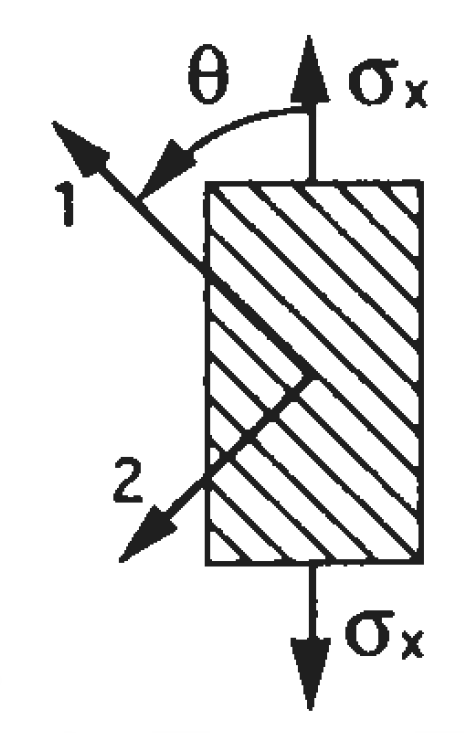
</div>

Determine the strenght for all angles $0<\theta<90$ using the Maximum Stress, Maximum strain and Tsai-Wu failure criterion. In case of the Tsai-Wu criterion, you may assume $f_{12}=-\frac{1}{2}\sqrt{f_{11}f_{22}}$. Plot the results for each failure criterion in a graph.

## Solution

Create the material and assign the fracture properties. Print to check the results.

In [25]:
from composite import TransverseIsotropic

glassepoxy = TransverseIsotropic( [39.0e9,8.6e9],0.28,3.254e9)

glassepoxy.setFailureProperties( [1080e6,620e6,39e6,128e6,89e6] )

print(glassepoxy)


  Elastic Properties:
  -----------------------------------------------------------
  E1     :     3.900e+10 , E2     :     8.600e+09 
  nu12   :          0.28 , G12    :     3.254e+09 

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     0.000e+00 , alpha2 :     0.000e+00 

  Strengths and failure model parameters:
  -----------------------------------------------------------
  Xt     :     1.080e+09 , Xc     :     6.200e+08 
  Yt     :     3.900e+07 , Yc     :     1.280e+08 
  S      :     8.900e+07
  GIc    :     0.000e+00 , GIIc   :     0.000e+00 
  alpha0 :     5.300e+01



The maximum allowable stress is determined in the following way. 

First, a unit stress vector is determined for a stress with magnitude $1\,$Pa under an angle of $\theta$. This unit stress is multiplied by a scaling factor sf. This scaling factor is increased until the failure index of the criterion exceeds 1.0. The corresponding sf factor is then stored as the value for the maximum allowable stress.

First Empty lists maxStress,maxStrain,TsaiWu are created to store the maximum allowable stresses for a given angle $\theta$, which is stored in the list theta.

The maximum stresses are calculate for 90 intervals between the angle 0 to 90 degrees.

In [26]:
from numpy import array,dot,linspace,zeros,pi,cos,sin

theta = list(range(0,91))

maxStress = []
maxStrain = []
TsaiWu    = []

sigma = zeros(3)

tiny  = 1.0e-6

Loop over all angles, calculate the correct stress components and perform the calculations for the 3 different failure criteria. We use the bisection method.

In [27]:
for t in theta:
  trad = t*pi/180

  sigma[0] = cos( trad )**2
  sigma[1] = sin( trad )**2
  sigma[2] = -sin( trad )*cos( trad )

  # Maxstress

  fi      = 0.0
  
  sf_low  = 0.0 
  sf_high = 1.0e15
  
  while fi > 1.+tiny or fi < 1.0-tiny:
    sf = 0.5*(sf_low+sf_high)
    
    fi = glassepoxy.getFIMaximumStress( sf*sigma )        
           
    if fi > 1.0:
      sf_high = sf
    else:
      sf_low  = sf
  
  maxStress.append(sf)

  # Maxstrain

  fi      = 0.0
  
  sf_low  = 0.0 
  sf_high = 1.0e15
  
  while fi > 1.+tiny or fi < 1.0-tiny:
    sf = 0.5*(sf_low+sf_high)
    
    fi = glassepoxy.getFIMaximumStrain( sf*sigma )        
           
    if fi > 1.0:
      sf_high = sf
    else:
      sf_low  = sf
  
  maxStrain.append(sf)
  
  # TsaiWu

  fi      = 0.0
  
  sf_low  = 0.0 
  sf_high = 1.0e15
  
  while fi > 1.+tiny or fi < 1.0-tiny:
    sf = 0.5*(sf_low+sf_high)
    
    fi = glassepoxy.getFITsaiWu( sf*sigma )        
           
    if fi > 1.0:
      sf_high = sf
    else:
      sf_low  = sf
  
  TsaiWu.append(sf)

Plot the results

91


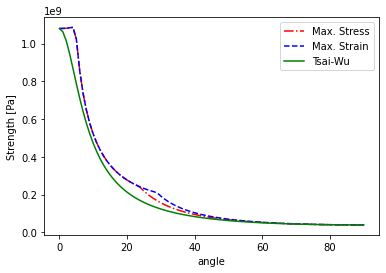

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(theta , maxStress , 'r-.' , label="Max. Stress")
plt.plot(theta , maxStrain , 'b--' , label="Max. Strain")
plt.plot(theta , TsaiWu    , 'g'   , label="Tsai-Wu")
plt.xlabel('angle')
plt.ylabel('Strength [Pa]')
plt.legend()
plt.show()